## 딥러닝응용 1주차 과제
### ML Classification

In [35]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Load Data
df = pd.read_csv('abalone.csv')
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


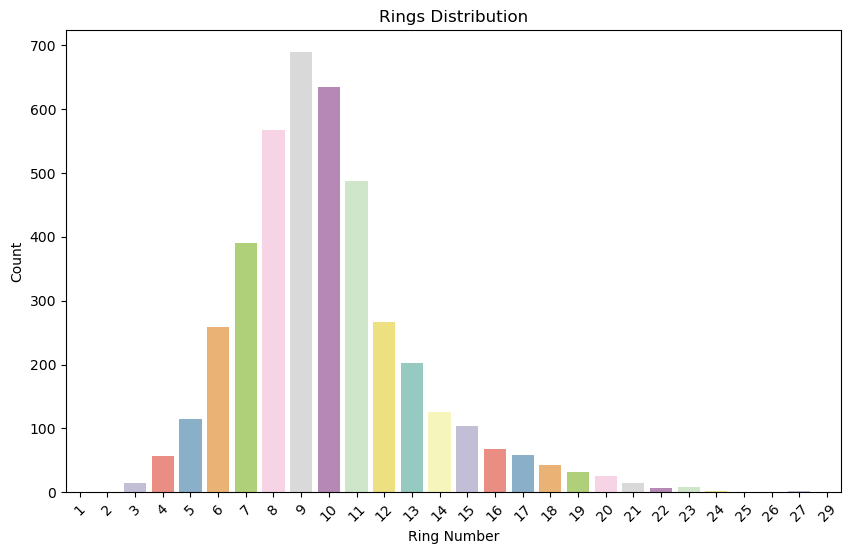

In [37]:
# Visualize Rings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Rings', hue='Rings', palette='Set3', legend=False)
plt.title('Rings Distribution')
plt.xlabel('Ring Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Data Preproccesing
from sklearn.preprocessing import LabelEncoder

sex_encoder = LabelEncoder()
rings_encoder = LabelEncoder()
df['Sex'] = sex_encoder.fit_transform(df['Sex'])
df['Rings'] = rings_encoder.fit_transform(df['Rings'])
df = df.drop(['id'], axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,14
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,6
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,8
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6


In [39]:
df.shape

(4177, 9)

In [40]:
# Create Target
x = df.drop(['Rings'], axis=1)
y = df['Rings']

In [41]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

# RF Train
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
# RF Test
y_pred = model.predict(x_test)

# Inverse Encoding
y_test_original = rings_encoder.inverse_transform(y_test)
y_pred_original = rings_encoder.inverse_transform(y_pred)

print("RF Classification Report")
print(classification_report(y_test_original, y_pred_original, zero_division=0))

RF Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.27      0.57      0.36         7
           5       0.31      0.19      0.24        26
           6       0.36      0.32      0.34        53
           7       0.21      0.28      0.24        79
           8       0.34      0.32      0.33       123
           9       0.28      0.34      0.30       152
          10       0.16      0.23      0.19       107
          11       0.21      0.28      0.24        92
          12       0.14      0.05      0.07        61
          13       0.06      0.05      0.05        42
          14       0.00      0.00      0.00        24
          15       0.17      0.05      0.07        21
          16       0.00      0.00      0.00        10
          17       0.14      0.11      0.12         9
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00         7
  

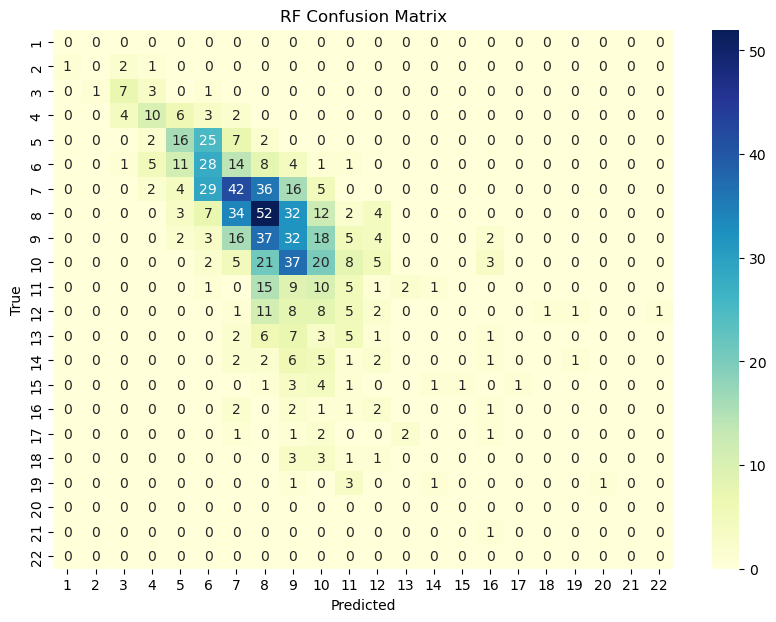

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Determine unique class labels
unique_labels = sorted(set(y_test) | set(y_pred))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RF Confusion Matrix')
plt.show()